In [34]:
import numpy as np
import matplotlib.pyplot as plt
import control
import pylab as py

In [35]:
def step_response(x):
    Kp = x[0]                 
    Ki = x[1]  
    Kd = x[2]
    PID = control.tf([Kd,Kp,Ki],[1.,0.])   # C(s)

    plant = control.tf([1.],[10.,1.])
    (num,den)  =  control.pade(1,n=5)       # 用pade近似延遲器
    time_delay = control.tf(num,den) 
    plant = PID * plant * time_delay/(1 + PID * plant * time_delay)           # C(s)G(s)/(1+C(s)G(s))
    
    t, y = control.step_response(plant,T=10) # step_response()方法求單位步階響應
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.show()

In [36]:
def close_loop(Kp,Ki,Kd):
    PID = control.tf([Kd,Kp,Ki],[1.,0.])    # C(s)
    plant = control.tf([1.],[10.,1.])
    (num,den)  =  control.pade(1,n=5)       # 用pade近似延遲器(exp(-s))
    time_delay = control.tf(num,den) 
    
    close_loop = PID * plant * time_delay/(1 + PID * plant * time_delay)         # C(s)G(s)/(1+C(s)G(s))
    t, y = control.step_response(close_loop,T=10) # step_response()方法求單位步階響應
    return t,y

In [37]:
def max_overshoot(t,y):
    max_value = y[np.argmax(y)]
    if max_value < 1:
        return 0
    else:
        return max_value-1

In [38]:
def settling_time(t,y,percentage):           #回傳安定時間(從最後的index找回來)
    for i in range(y.size):
        if (y[y.size-1-i] > 1+percentage or y[y.size-1-i] < 1-percentage) :
            return t[y.size-1-i]


In [39]:
def steady_state_error(t,y):    #穩態誤差
    ess = (1-y[y.size-1])
    return abs(ess)

In [40]:
ideal_Mo=0.05
ideal_ts=2
ideal_Ess=0

In [41]:
def loss(Kp,Ki,kd):
    t,y = close_loop(Kp,Ki,kd)
    Mo =  max_overshoot(t,y)
    ts = settling_time(t,y,0.02)
    ess = steady_state_error(t,y)

    error = (3*(Mo-ideal_Mo)**2+1*(ts-ideal_ts)**2+2*(ess-ideal_Ess)**2)**(1/2)  #定義loss function
    return error

In [42]:
#定義PSO參數
pop_size = 30             #總共想設計幾組參數組合
dimemsion = 3             #每個組合的參數數量
max_iter = 30            # maximum number of iterations 

w = np.linspace(0.9, 0.4, max_iter)                   # Intertial weight.Set to vary with iteration number.

c1 = 2.0                  # Weight of searching based on the optima found by a particle
c2 = 2.0                  # Weight of searching based on the optima found by the swarm
    
pbest_val = np.zeros(pop_size)            # Personal best fintess value. One pbest value per particle.
gbest_val = np.zeros(max_iter)            # Global best fintess value. One gbest value per iteration (stored).

pbest = np.zeros((pop_size,dimemsion))      # pbest solution
gbest = np.zeros(dimemsion)                 # gbest solution

gbest_store = np.zeros((max_iter,dimemsion))   # storing gbest solution at each iteration

pbest_val_avg_store = np.zeros(max_iter)
fitness_avg_store = np.zeros(max_iter)

# x = np.random.rand(pop_size,dimemsion)           # Initial position of the particles
# x = np.random.randn(pop_size,dimemsion)          #隨機產生包含負數的值
x = np.random.uniform(0,5,(pop_size,dimemsion))   #隨機產生0~5的值
v = np.zeros((pop_size,dimemsion))                # Initial velocity of the particles


Iter. = 0 . gbest_val =  0.13167109284075207
Iter. = 1 . gbest_val =  0.13167109284075207
Iter. = 2 . gbest_val =  0.13370859895568188
Iter. = 3 . gbest_val =  0.15110930117044516
Iter. = 4 . gbest_val =  0.44139954001252574
Iter. = 5 . gbest_val =  0.44139954001252574
Iter. = 6 . gbest_val =  0.44139954001252574
Iter. = 7 . gbest_val =  0.44139954001252574
Iter. = 8 . gbest_val =  0.44139954001252574
Iter. = 9 . gbest_val =  0.6468784944134839
Iter. = 10 . gbest_val =  0.6468784944134839
Iter. = 11 . gbest_val =  0.6468784944134839
Iter. = 12 . gbest_val =  0.6468784944134839
Iter. = 13 . gbest_val =  0.6468784944134839
Iter. = 14 . gbest_val =  0.6468784944134839
Iter. = 15 . gbest_val =  0.6468784944134839
Iter. = 16 . gbest_val =  3.2335432093964425
Iter. = 17 . gbest_val =  3.2335432093964425
Iter. = 18 . gbest_val =  3.2335432093964425
Iter. = 19 . gbest_val =  3.2335432093964425
Iter. = 20 . gbest_val =  3.724748698865777
Iter. = 21 . gbest_val =  4.027449609546577
Iter. = 22 . 

Text(0, 0.5, 'Best solution, gbest[:,iter]')

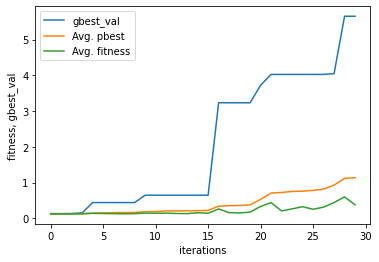

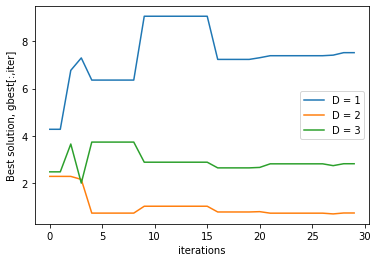

In [43]:
# Loop over the generations
for iter in range(0,max_iter):
    error = []
    fitness = []
    for i in range(pop_size):      #每次迭代先算出30組particle的fitness
        Kp = x[i,0]                 
        Ki = x[i,1]  
        Kd = x[i,2]  
        for k in range(dimemsion): #限制參數範圍0~15
            if (x[i,k]<0):
                x[i,k]=0
            if (x[i,k]>15):
                x[i,k]=15

        error.append(loss(Kp,Ki,Kd))
        fitness = 1 / np.array(error)
    
    if iter == 0:
        pbest_val = fitness            # initial personal best = initial fitness values. Vector of size Np
        pbest = x                   # initial pbest solution = initial position. Matrix of size D x Np
        
    else:
        # pbest and pbest_val update
        ind = np.argwhere(fitness > pbest_val)   # indices where current fitness value set is greater than pbset
        pbest_val[ind] = fitness[ind]   # update pbset_val at those particle indices where fit > pbest_val
        pbest[ind,:] = x[ind,:]     # update pbest for those particle indices where fit > pbest_val 
             
                    
    if iter > 0:                                      # Do not update postion for 0th iteration
        r1 = np.random.rand(pop_size,dimemsion)       # random numbers [0,1]
        r2 = np.random.rand(pop_size,dimemsion)       # random numbers [0,1]  
        v_global = np.multiply((gbest-x),r2)*c2       # velocity towards global optima
        v_local  = np.multiply((pbest-x),r1)*c1       # velocity towards local optima (pbest)
        
        v = w[iter]*v + (v_local + v_global)          # velocity update (w隨著迭代次數增加而下降)
        x = x + v                                     # position update
    
                
    # gbest and gbest_val update
    ind2 = np.argmax(pbest_val)              # index where the fitness is maximum
    gbest_val[iter] = pbest_val[ind2]        # 所有個體最佳解的最大值及為群體最佳解
    gbest = pbest[ind2,:]                    # global best solution, gbest
        
    gbest_store[iter,:] = gbest              # store gbest solution
        
    pbest_val_avg_store[iter] = np.mean(pbest_val)
    fitness_avg_store[iter] = np.mean(fitness)
    print("Iter. =", iter, ". gbest_val = ", gbest_val[iter])  # print iteration no. and best solution at each iteration
    
# Plotting
py.close('all')
py.plot(gbest_val,label = 'gbest_val')
py.plot(pbest_val_avg_store, label = 'Avg. pbest')
py.plot(fitness_avg_store, label = 'Avg. fitness')
py.legend()
#py.gca().set(xlabel='iterations', ylabel='fitness, gbest_val')

py.xlabel('iterations')
py.ylabel('fitness, gbest_val')
py.figure()


for m in range(dimemsion):
    py.plot(gbest_store[:,m],label = 'D = ' + str(m+1))
    
py.legend()
py.xlabel('iterations')
py.ylabel('Best solution, gbest[:,iter]')

[7.52069123 0.73857838 2.82219986]


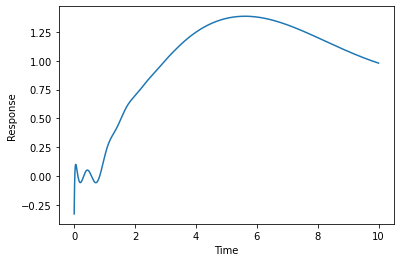

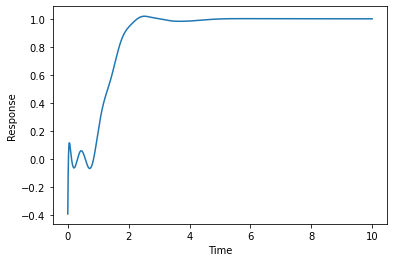

0.17684209187599356

In [44]:
print(gbest)
step_response(gbest_store[0,:])  #一開始的gbest響應
step_response(gbest)             #100次迭代後的gbest響應
loss(gbest[0],gbest[1],gbest[2])